In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

In [2]:
url_ty="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
#url_1="https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
death_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
df = pd.read_csv(url_ty, error_bad_lines = False)
deathf = pd.read_csv(death_url, error_bad_lines = False)

In [3]:
date_cols = [x for x in df.columns if x[-1]=="0"]

In [4]:
death_date_cols = [x for x in deathf.columns if x[-1]=="0"]

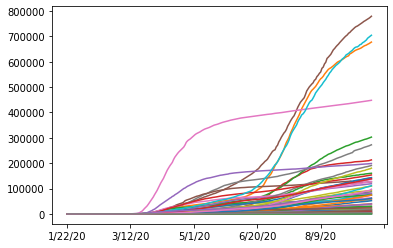

In [5]:
#total confirmed for each state
    
df.groupby("Province_State")[date_cols].sum().T.plot(legend=False)

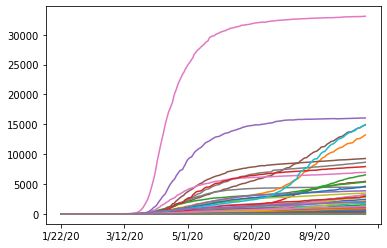

In [6]:
#total dead for each state

deathf.groupby("Province_State")[date_cols].sum().T.plot(legend=False)

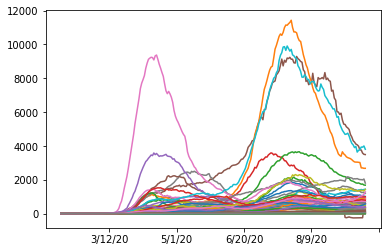

In [7]:
#total daily incident cases for each state

df.groupby("Province_State")[date_cols].sum().T.diff().rolling(14).mean().plot(legend=False) 

In [8]:
#confirmed time series (should I reset the index?)-did both

confirmed = df.groupby("Province_State")[date_cols].sum()
confirmed_reset = df.groupby("Province_State")[date_cols].sum().reset_index()

In [9]:
#death time series (should I reset the index?)-did both

death = deathf.groupby("Province_State")[death_date_cols].sum() 
death_reset = deathf.groupby("Province_State")[death_date_cols].sum().reset_index()

In [10]:
big_state_death = death[(death["8/7/20"]>5000)]

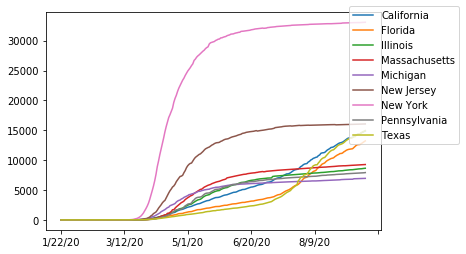

In [11]:
#cumulative deaths for worst hit states

big_state_death.T.plot().legend(loc='upper right', bbox_to_anchor=(1.25, 1.05))

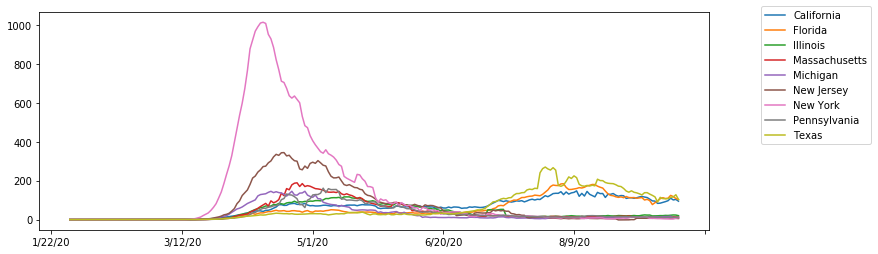

In [12]:
#daily incident deaths in worst hit states

big_state_death.T.diff().rolling(7).mean().plot(figsize=(12,4)).legend(loc='upper right', bbox_to_anchor=(1.25, 1.05))

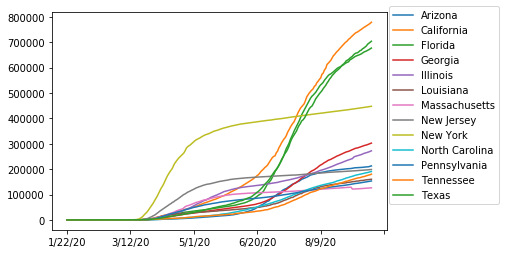

In [13]:
# confirmed cases of largest states
big_states = confirmed[(confirmed["8/7/20"]>100000) & (confirmed["8/7/20"]<1000000)]
big_states.T.plot().legend(loc='upper right', bbox_to_anchor=(1.35, 1.05))

In [14]:
#daily incident cases of Largest states
big_states.T.diff().rolling(7).mean().iplot()

In [15]:
#grab state populations from death data and merge into confirmed cases

state_pop = deathf.groupby("Province_State")["Population"].sum().T
confirmed_w_pop = pd.merge(confirmed, pd.DataFrame(state_pop), left_index=True, right_index=True)

In [16]:
#divide each day in time series by the states population

confirmed_norm = confirmed_w_pop.iloc[:,:-1].div(confirmed_w_pop["Population"], axis=0)
#confirmed_norm.head()

In [17]:
#find states hit worst as a proportion of population( yvalues are in percents)

conf_norm_range = confirmed_norm[(confirmed_norm["8/7/20"]>.017) & (confirmed_norm["8/7/20"]<1)]
conf_norm_range.T.iplot()        #.legend(loc='upper right', bbox_to_anchor=(1.45, 1.05))

In [18]:
# daily incident cases as a percent of population

conf_norm_range.T.diff().rolling(7).mean().iplot()    #.legend(loc='upper right', bbox_to_anchor=(1.45, 1.05))

In [19]:
# U.S. daily incident case numbers

df.groupby("Country_Region")[date_cols].sum().T.diff().rolling(7).mean().iplot()

In [21]:
# U.S. daily covid deaths

deathf.groupby("Country_Region")[date_cols].sum().T.diff().rolling(7).mean().iplot()

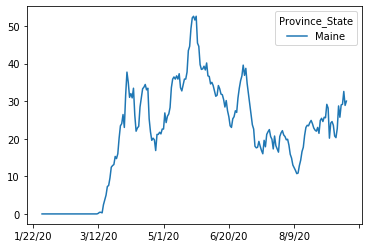

In [22]:
#daily incident cases for Maine

confirmed_reset[confirmed_reset["Province_State"] == "Maine"].set_index("Province_State").T.diff().rolling(7).mean().plot()

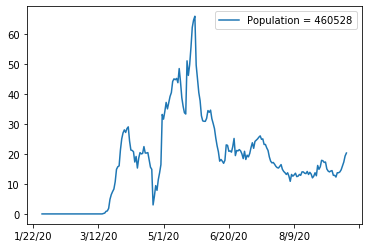

In [23]:
#Syracuse county daily confirmed cases
pop_Syr = deathf[(deathf["Admin2"] == "Onondaga") & (df["Province_State"] == "New York")]["Population"]

df[df["Admin2"] == "Onondaga"][date_cols].T.diff().rolling(7).mean().plot().legend(["Population = %i"% pop_Syr])

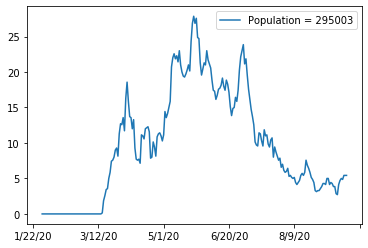

In [24]:
#Portland county daily confirmed cases
pop_Cumb = deathf[(deathf["Admin2"] == "Cumberland") & (df["Province_State"] == "Maine")]["Population"]

df[(df["Province_State"] == "Maine") & (df["Admin2"] == "Cumberland")][date_cols].T.diff().rolling(7).mean().plot().legend(["Population = %i"% pop_Cumb])

8 week cumulative cases

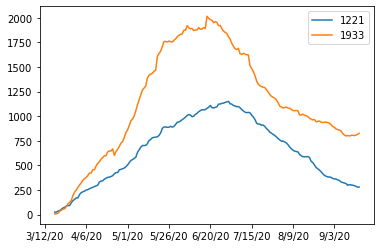

In [25]:
#Syracuse
#pop_Syr = deathf[(deathf["Admin2"] == "Onondaga") & (df["Province_State"] == "New York")]["Population"]

#Portland
#pop_Cumb = deathf[(deathf["Admin2"] == "Cumberland") & (df["Province_State"] == "Maine")]["Population"]

df[(df["Admin2"] == "Onondaga") | (df["Admin2"] == "Cumberland") & (df["Province_State"] == "Maine")][date_cols].T.diff().rolling(7*8).sum().plot().legend()